In [1]:
%load_ext autoreload
%autoreload 2

import vcf
import json
import os
import pandas as pd
import uuid

pd.set_option('display.max_colwidth', None)

In [21]:
project_folder = "diygenomics-projects"
sub_category = "DATA"
work_bucket = "genomes"

input_file = 'citizen_2_long_Illumina_VCF_file.vcf'
output_file = 'citizen_2_long_Illumina_VCF_file.csv'

In [3]:
data_path = os.getenv('DATA_PATH')
file_path = lambda *args: os.path.join(data_path, project_folder, sub_category, work_bucket, *args)

In [4]:
vcf_reader = vcf.Reader(open(file_path(input_file), 'r'))

In [7]:
data = []
for record in vcf_reader:
    data.append({
        'CHROM': record.CHROM,
        'POS': record.POS,
        'REF': record.REF,
        'ALT': record.ALT
    })

In [8]:
df = pd.DataFrame(data)

In [22]:
df.to_csv(file_path(output_file))

In [9]:
df

,CHROM,POS,REF,ALT
0,chr1,6085392,T,[C]
1,chr1,6087241,T,[A]
2,chr1,6087411,T,[C]
3,chr1,6088009,G,[A]
4,chr1,6088273,T,[G]
...,...,...,...,...
3440265,chrY,28787141,C,[G]
3440266,chrY,28788643,G,[T]
3440267,chrY,28788695,T,[A]
3440268,chrY,28815270,C,[A]


In [10]:
df.columns

Index(['CHROM', 'POS', 'REF', 'ALT'], dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3440270 entries, 0 to 3440269
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   CHROM   object
 1   POS     int64 
 2   REF     object
 3   ALT     object
dtypes: int64(1), object(3)
memory usage: 105.0+ MB


In [12]:
df.describe()

,POS
count,3.440270e+06
mean,7.848312e+07
std,5.636482e+07
min,8.280000e+02
25%,3.191740e+07
50%,6.891521e+07
75%,1.145529e+08
max,2.492398e+08


In [13]:
df['CHROM'].value_counts()

chr2     280811
chr1     258183
chr4     257578
chr3     236540
chr6     217788
chr5     207429
chr7     195480
chr8     183325
chr11    177574
chr10    169004
chr12    162384
chr9     148448
chr13    132381
chr14    113609
chr16    106132
chr15    100176
chr18     97769
chr17     95168
chr20     70397
chr19     69306
chrX      64597
chr21     51627
chr22     44333
chrY        231
Name: CHROM, dtype: int64

In [15]:
# df['ALT'].value_counts()

In [16]:
df.isnull().sum()

CHROM    0
POS      0
REF      0
ALT      0
dtype: int64

<AxesSubplot:>

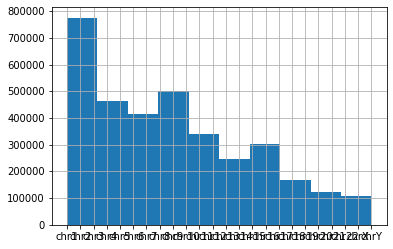

In [19]:
df['CHROM'].hist()

In [20]:
pd.crosstab(df['CHROM'], df['REF'])

REF,A,C,G,T
CHROM,,,,
chr1,62471,67013,66174,62525
chr10,40381,44162,43958,40503
chr11,43062,45975,45633,42904
chr12,39422,41851,41992,39119
chr13,33032,33276,33365,32708
chr14,27634,29186,29346,27443
chr15,23821,26197,26194,23964
chr16,24870,28488,28349,24425
chr17,22510,24915,25335,22408
